### Zadanie X: Analiza cech irysów z użyciem wykresów pudełkowych

Wróćmy do zbioru z pomiarami irysów - https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. Tym razem zadanie będzie polegało na przedstawieniu podstawowych pomiarów dla poszczególnych gatunków irysów na wykresach pudełkowych.

**1. Wczytanie danych** 

Wczytaj zbiór danych z url.

In [5]:
import pandas as pd

# Wczytaj dane
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=column_names)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**2. Obliczenia statystyczne**

Dla każdej cechy (sepal_length, sepal_width, petal_length, petal_width) oblicz:
- wartość minimalną
- wartość maksymalną
- medianę
- pierwszy (Q1) i trzeciy kwartyl (Q3)
- odchylenie standardowe

Oblicz również błędy standardowe dla każdej cechy.

In [11]:
import numpy as np

# Funkcja do obliczeń
def calculate_statistics(df):
    stats = {}
    for column in df.columns[:-1]:  # Wszystkie kolumny oprócz 'species'
        stats[column] = {
            'min': df[column].min(),
            'max': df[column].max(),
            'median': df[column].median(),
            'Q1': df[column].quantile(0.25),
            'Q3': df[column].quantile(0.75),
            'std_dev': df[column].std(),
            'std_err': df[column].std() / np.sqrt(len(df[column]))  # Błąd standardowy
        }
    return pd.DataFrame(stats)

# Obliczenia dla każdego gatunku
# statistics_by_species = df.groupby('species').apply(calculate_statistics).reset_index()
# Bez include_groups=False dostaję ostrzeżenie
# DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. 
# This behavior is deprecated, and in a future version of pandas the grouping 
# columns will be excluded from the operation. Either pass include_groups=False 
# to exclude the groupings or explicitly select the grouping columns after 
# groupby to silence this warning.
statistics_by_species = df.groupby('species').apply(calculate_statistics, include_groups=False).reset_index()
print("\nObliczone wartości statystyczne dla cech irysów:")
statistics_by_species


Obliczone wartości statystyczne dla cech irysów:


,species,level_1,sepal_length,sepal_width,petal_length
0,Iris-setosa,min,4.300000,2.300000,1.000000
1,Iris-setosa,max,5.800000,4.400000,1.900000
2,Iris-setosa,median,5.000000,3.400000,1.500000
3,Iris-setosa,Q1,4.800000,3.125000,1.400000
4,Iris-setosa,Q3,5.200000,3.675000,1.575000
5,Iris-setosa,std_dev,0.352490,0.381024,0.173511
6,Iris-setosa,std_err,0.049850,0.053885,0.024538
7,Iris-versicolor,min,4.900000,2.000000,3.000000
8,Iris-versicolor,max,7.000000,3.400000,5.100000
9,Iris-versicolor,median,5.900000,2.800000,4.350000


**3. Wykresy pudełkowe** 

Narysuj wykresy pudełkowe dla każdej cechy, grupując według gatunku. Upewnij się, że na wykresach widoczne są również błędy standardowe.

In [4]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


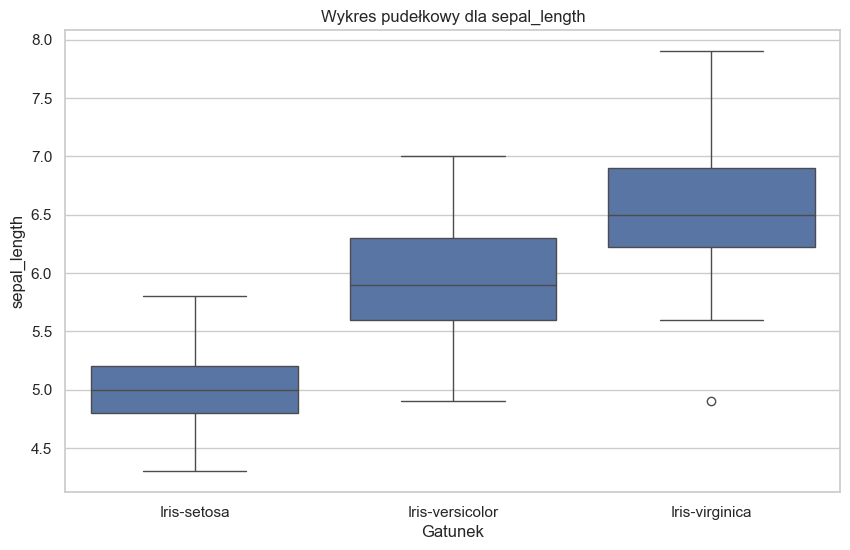

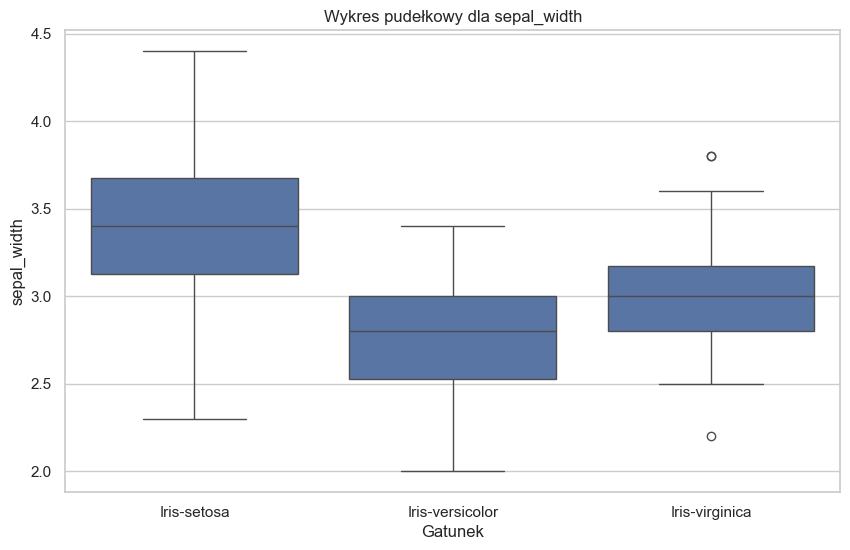

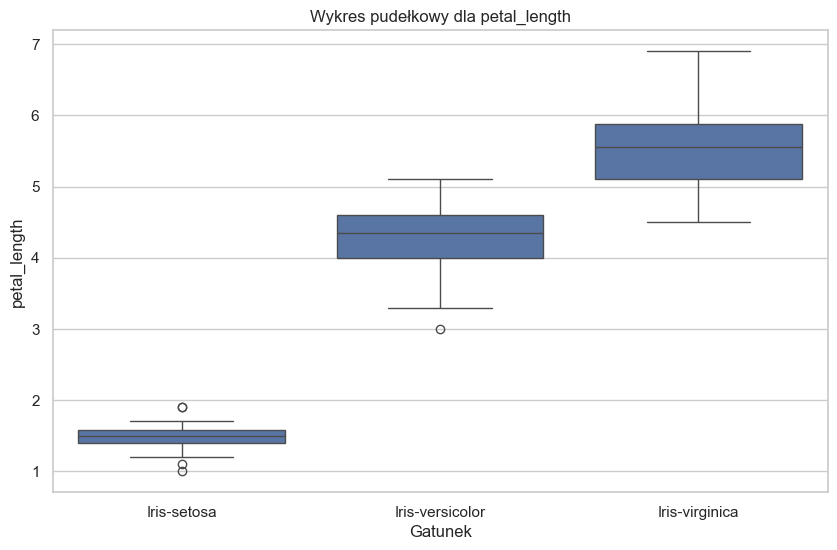

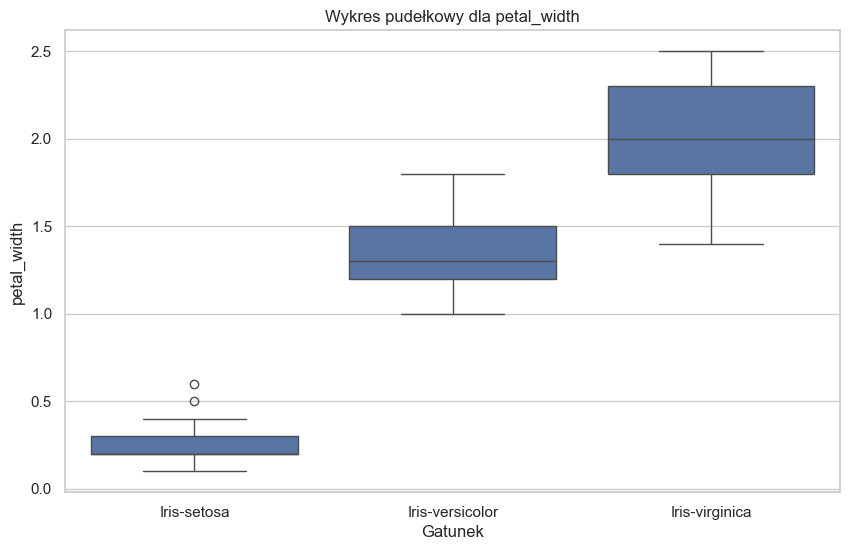

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wizualizacji
sns.set(style="whitegrid")

# Wykresy pudełkowe dla każdej cechy
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Wykres pudełkowy dla {feature}')
    plt.ylabel(feature)
    plt.xlabel('Gatunek')
    plt.show()